# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 10</span>

### Exercise 10.1

Choose **ONLY ONE** of the two following possibilities:

1. Parallelize with MPI libraries your Genetic Algorithm code in order to solve the TSP by performing a *Genetic Search* with (up to) 11 **parallel GA searches of the optimal path**:
each node should perform an independent GA search, the so-called *Continent*, **but** every $N_{migr}$ generations the *Continents* should exchange their best individuals randomly.

2. Starting from your Genetic Algorithm code implement a **Parallel Tempering algorithm** (Simulated Annealing with many temperatures). Parallelize with MPI libraries your algorithm in order to solve the TSP where each computing node, up to 11, is characterized by a different temperature or a limited set of temperatures (if you need more than 11 temperatures). Use your genetic operators (except crossover) as trial moves for the Metropolis algorithm and **add a trial move that proposes an exchange of paths among adjacent temperatures (nodes)** (see lecture 8 for the acceptance formula). The candidate solution of the TSP will appear on the node with the lower temperature.

### Exercise 10.2

Apply your parallel code to the TSP problem for 110 italian "capoluoghi di provincia" longitude and latitude coordinates in the *cap_prov_ita.dat* file.

If your choice in Exercise 10.1 is option 1, do you improve with respect using the same number of computing cores but with **independent GA searches** ?

If your choice in Exercise 10.1 is option 2, by using a number of temperatures equal to the number of individuals in your **non-parallel Genetic Algorithm code**, do you "improve" with respect to it?

First of all I parallelized my code and tried to execute it first of all with indipendent Genetic Algorithm searches.

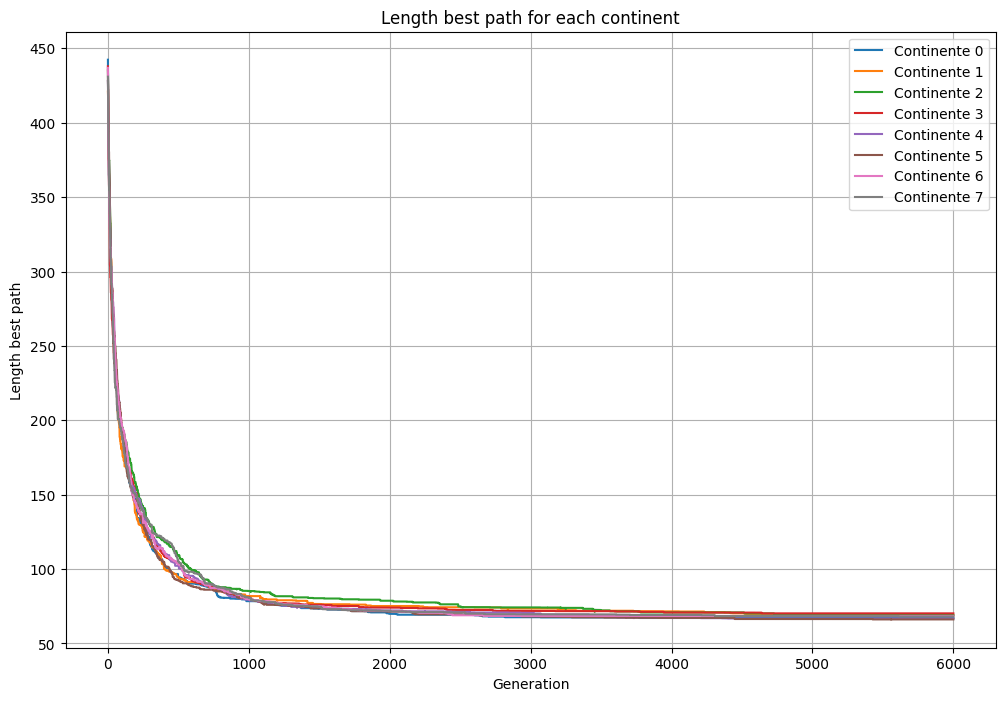

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Inizializza il grafico
plt.figure(figsize=(12, 8))

# Crea un ciclo per caricare e plottare i dati da tutti e 8 i file
for i in range(8):
    # Genera il nome del file
    filename = f"RESULTS/08_CORE_INDIPENDENT/fastest_rank_{i}.dat"
    
    # Carica i dati dal file
    x, y = np.loadtxt(filename, usecols=(0, 1), unpack=True)
    
    # Plotta i dati
    plt.plot(x, y, label=f'Continente {i}')

# Aggiungi titolo e etichette
plt.title('Length best path for each continent')
plt.xlabel('Generation')
plt.ylabel('Length best path')
plt.grid(True)

# Aggiungi la legenda
plt.legend()

# Mostra il grafico
plt.show()

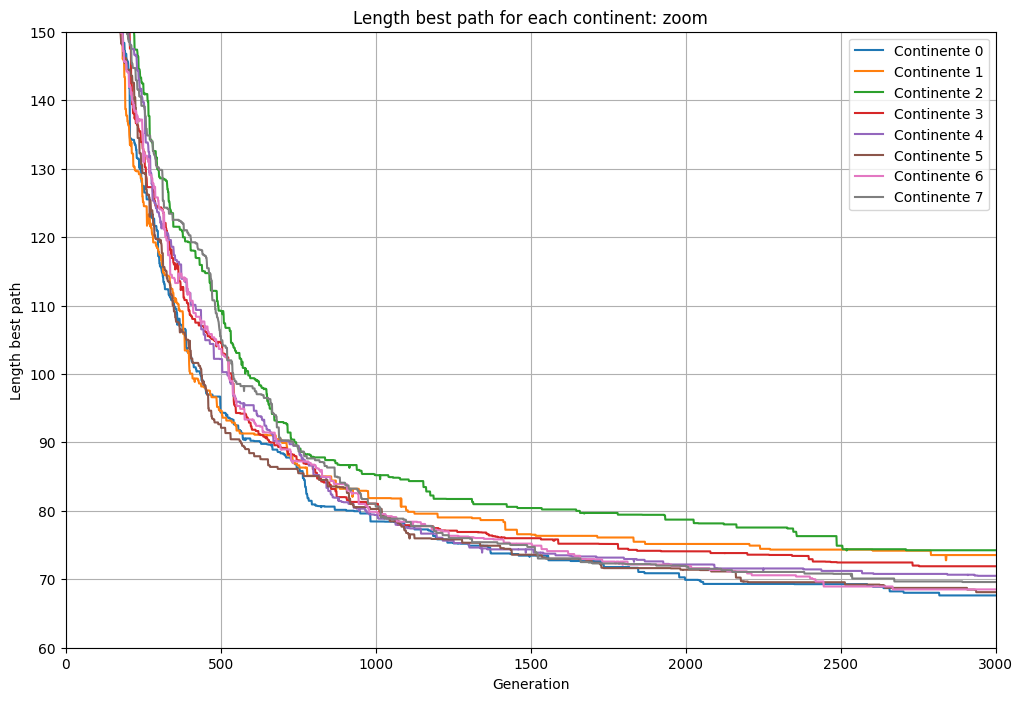

In [17]:
# Inizializza il grafico
plt.figure(figsize=(12, 8))

# Crea un ciclo per caricare e plottare i dati da tutti e 8 i file
for i in range(8):
    # Genera il nome del file
    filename = f"RESULTS/08_CORE_INDIPENDENT/fastest_rank_{i}.dat"
    
    # Carica i dati dal file
    x, y = np.loadtxt(filename, usecols=(0, 1), unpack=True)
    
    # Plotta i dati
    plt.plot(x, y, label=f'Continente {i}')

# Aggiungi titolo e etichette
plt.title('Length best path for each continent: zoom')
plt.xlabel('Generation')
plt.ylabel('Length best path')
plt.grid(True)

plt.xlim(0, 3000)
plt.ylim(60, 150)

# Aggiungi la legenda
plt.legend()

# Mostra il grafico
plt.show()

Only two Continents find a lenght less than $67$ and the best path has $L=66.1665$.

In [18]:
import folium

# Creazione della mappa centrata su Roma, Italia
world_map = folium.Map(location=[41.902782, 12.496366], zoom_start=6)

data = np.loadtxt('RESULTS/08_CORE_INDIPENDENT/path_rank_5.dat')
# Estrazione di latitudini e longitudini
latitudes = data[:, 1]
longitudes = data[:, 2]

# Creazione di una lista di coordinate
coordinates = list(zip(latitudes, longitudes))

# Disegna una singola linea che collega tutti i punti
folium.PolyLine(locations=coordinates, color='blue').add_to(world_map)

# Visualizzazione della mappa
world_map

Then I implemented migration and I was able to improve the previous result: I found $L = 65.2539$.

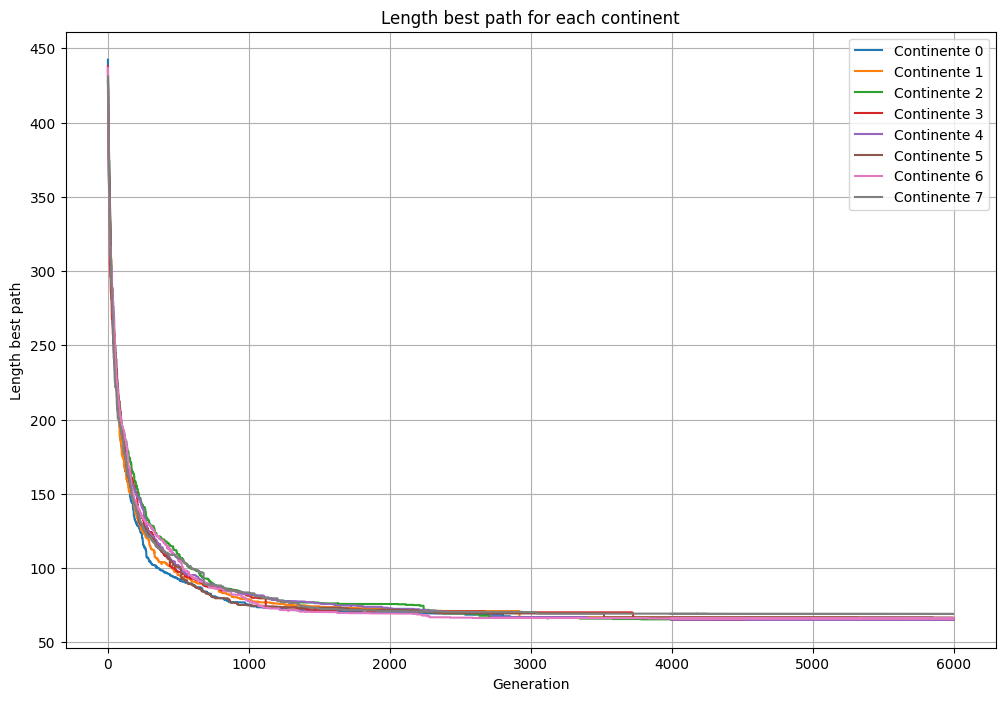

In [19]:
# Inizializza il grafico
plt.figure(figsize=(12, 8))

# Crea un ciclo per caricare e plottare i dati da tutti e 8 i file
for i in range(8):
    # Genera il nome del file
    filename = f"RESULTS/08_CORE_MIGRATION/fastest_rank_{i}.dat"
    
    # Carica i dati dal file
    x, y = np.loadtxt(filename, usecols=(0, 1), unpack=True)
    
    # Plotta i dati
    plt.plot(x, y, label=f'Continente {i}')

# Aggiungi titolo e etichette
plt.title('Length best path for each continent')
plt.xlabel('Generation')
plt.ylabel('Length best path')
plt.grid(True)

# Aggiungi la legenda
plt.legend()

# Mostra il grafico
plt.show()

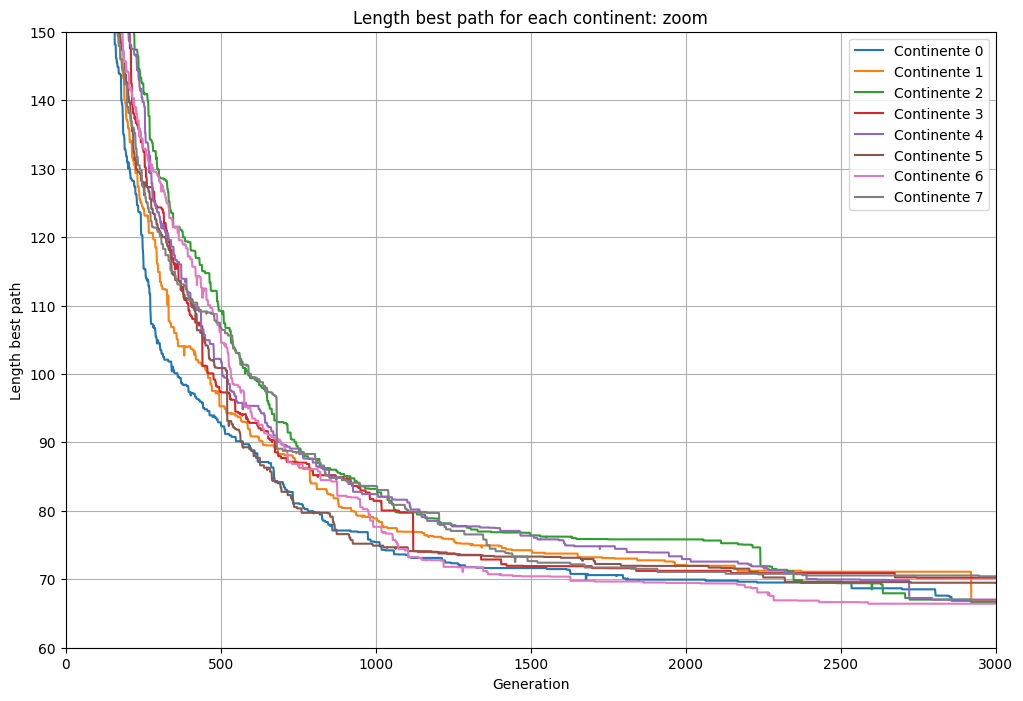

In [20]:
# Inizializza il grafico
plt.figure(figsize=(12, 8))

# Crea un ciclo per caricare e plottare i dati da tutti e 8 i file
for i in range(8):
    # Genera il nome del file
    filename = f"RESULTS/08_CORE_MIGRATION/fastest_rank_{i}.dat"
    
    # Carica i dati dal file
    x, y = np.loadtxt(filename, usecols=(0, 1), unpack=True)
    
    # Plotta i dati
    plt.plot(x, y, label=f'Continente {i}')

# Aggiungi titolo e etichette
plt.title('Length best path for each continent: zoom')
plt.xlabel('Generation')
plt.ylabel('Length best path')
plt.grid(True)

plt.xlim(0, 3000)
plt.ylim(60, 150)

# Aggiungi la legenda
plt.legend()

# Mostra il grafico
plt.show()

In [22]:
# Creazione della mappa centrata su Roma, Italia
world_map = folium.Map(location=[41.902782, 12.496366], zoom_start=6)

data = np.loadtxt('path.dat')
# Estrazione di latitudini e longitudini
latitudes = data[:, 1]
longitudes = data[:, 2]

# Creazione di una lista di coordinate
coordinates = list(zip(latitudes, longitudes))

# Disegna una singola linea che collega tutti i punti
folium.PolyLine(locations=coordinates, color='blue').add_to(world_map)

# Visualizzazione della mappa
world_map

Showing the two trends together we can understand where is the difference between indipendent Genetic Algorithm and the communicating one.

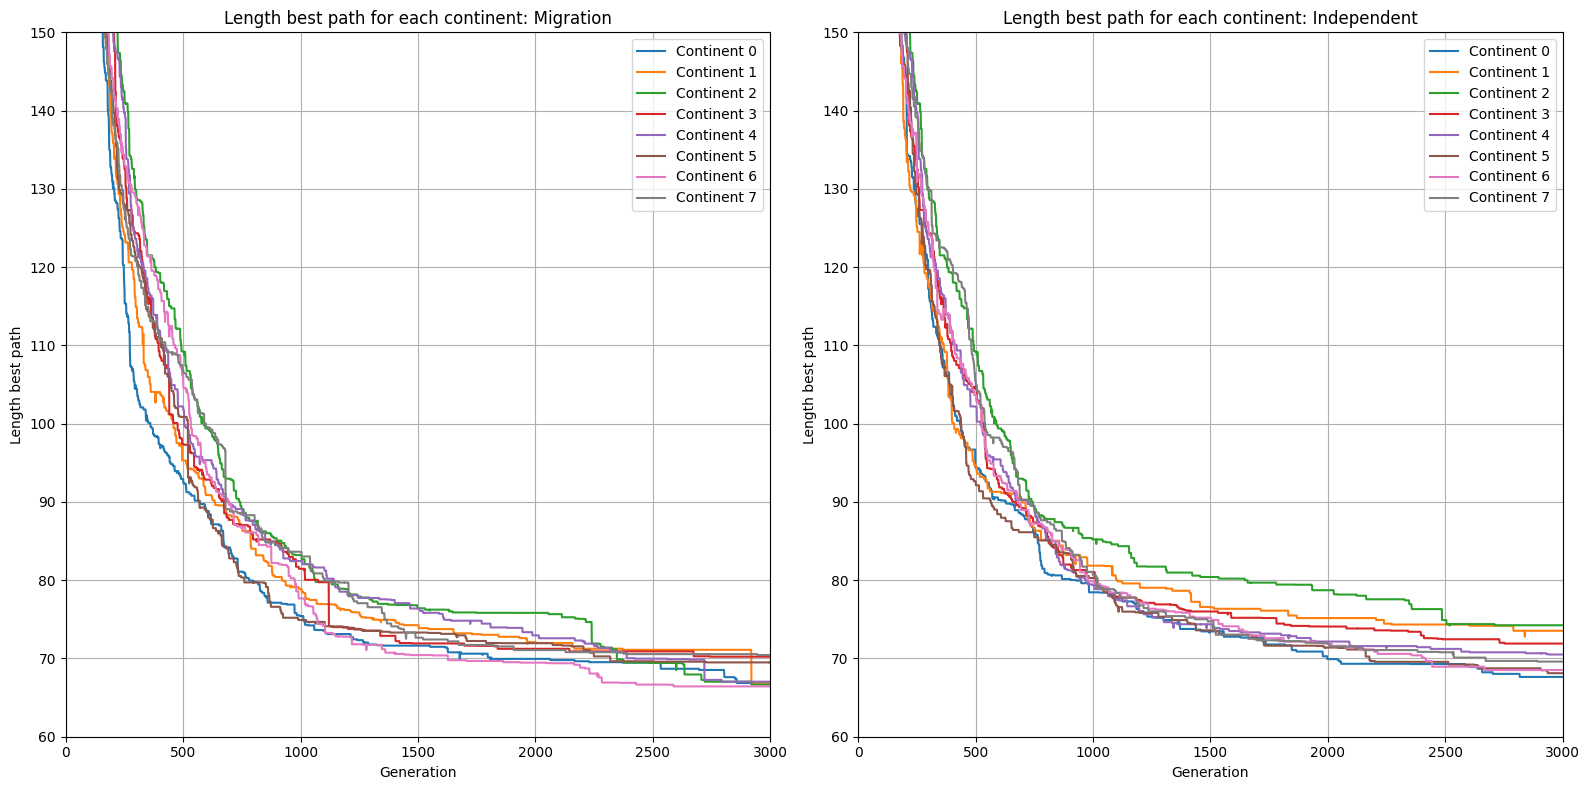

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Inizializza la figura e i subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Definisci i nomi dei file e le etichette per i due set di dati
filenames = [
    "RESULTS/08_CORE_MIGRATION/fastest_rank_{}.dat",
    "RESULTS/08_CORE_INDIPENDENT/fastest_rank_{}.dat"
]
labels = ['Migration', 'Independent']

# Itera per caricare e plottare i dati da entrambi i set di file
for idx, filename_template in enumerate(filenames):
    # Crea un ciclo per caricare e plottare i dati da tutti e 8 i file
    for i in range(8):
        # Genera il nome del file
        filename = filename_template.format(i)
        
        # Carica i dati dal file
        x, y = np.loadtxt(filename, usecols=(0, 1), unpack=True)
        
        # Plotta i dati nel subplot corrispondente
        axs[idx].plot(x, y, label=f'Continent {i}')

    # Aggiungi titolo, etichette e limiti agli assi per il subplot corrente
    axs[idx].set_title(f'Length best path for each continent: {labels[idx]}')
    axs[idx].set_xlabel('Generation')
    axs[idx].set_ylabel('Length best path')
    axs[idx].grid(True)
    axs[idx].set_xlim(0, 3000)
    axs[idx].set_ylim(60, 150)
    
    # Aggiungi la legenda per il subplot corrente
    axs[idx].legend()

# Mostra la figura con i due subplot affiancati
plt.tight_layout()
plt.show()


The code with the migration function implemented appears more compact: sharing information and beneficial mutations that propagate exponentially is clearly advantageous!

I also tried executing the code with 6 and 11 continents, but I didn't find any better path. I made numerous attempts to optimize parameters for mutations and crossover, but ultimately, I believe it largely depends on luck: if the code finds a good swap or a precise permutation, the path can improve significantly, but there isn't much room for deliberate intervention. Of course, we can vary the parameters of our computations, but ultimately randomness plays a decisive role. One approach we can take is to sample paths as extensively as possible to avoid getting stuck in a local minimum. That's why I chose the following parameters:
- crossover: $80 \%$
- shift: $10 \%$
- permutation: $10 \%$
- inversion: $20 \%$
- pair permutation: $20 \%$

I set:
- population = $3000$
- generations = $40000$
- migration = $40$
